In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import numpy as np 
%matplotlib inline

In [2]:
from scipy.special import expit
class NumpyClassifier():
    """Common methods to """

    def accuracy(self, X_test, y_test, **kwargs):
        pred = self.predict(X_test, **kwargs)
        if len(pred.shape) > 1:
            pred = pred[:, 0]
        return sum(pred == y_test) / len(pred)


class NumpyLogReg(NumpyClassifier):
    def __init__(self, eta, lmb) -> None:
        super().__init__()
        self.eta = eta
        self.lmb = lmb
        
    
    def add_bias(self,X):
        return np.c_[np.ones(X.shape[0])*(-1), X]

    def fit(self, X_train, t_train,batch_size, epochs=30):
        """X_train is a Nxm matrix, N data points, m features
        t_train are the targets values for training data"""
        m = X_train.shape[1]
        n_batches = np.ceil(X_train.shape[0] / batch_size)

      
        X_train = self.add_bias(X_train)
        self.beta =  np.zeros(m + 1)
        
        indicies = np.arange(X_train.shape[0])

        for epoch in range(epochs):
            np.random.shuffle(indicies)
            minibatches_idx = np.array_split(indicies, n_batches)
            
            for minibatch in range(len(minibatches_idx)):
                xi = np.take(X_train, minibatches_idx[minibatch],axis=0)
                yi = np.take(t_train, minibatches_idx[minibatch],axis=0)
            
                
                self.newton_step(xi, yi)
           

    def forward(self, X):
        return expit(X @ self.beta)
    
    def newton_step(self, X,y):
        p = self.forward(X)
        score = X.T @ (y-p)
        
        W = np.zeros(shape=(len(y),len(y)))
        p_1 = 1-p
        np.fill_diagonal(W,(p*p_1))
        
        hessian = -X.T@W@X
        update = (np.linalg.pinv(hessian) @ score) + self.lmb*self.beta
        self.beta -= self.eta * update

        
        
    def predict(self, x, threshold=0.5):
        z = self.add_bias(x)
        score = self.forward(z)
        # score = z @ self.theta
        return (score > threshold).astype('int')


In [3]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,test_size=0.25,random_state=4155)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)





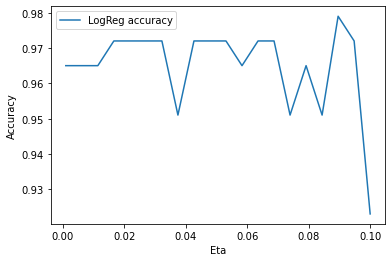

In [4]:

eta_list = np.linspace(0.001,0.1,20)
acu_scores = np.zeros(len(eta_list))
 
cntr = 0
for eta in eta_list:
    logreg_test = NumpyLogReg(eta = eta, lmb = 1)
    logreg_test.fit(X_train_scaled,y_train,batch_size= 5, epochs=50)
    score = acu_scores[cntr] = logreg_test.accuracy(X_test_scaled, y_test)
    cntr += 1 
    
    
plt.plot(eta_list, acu_scores, label = "LogReg accuracy")
plt.xlabel("Eta")
plt.ylabel("Accuracy")
plt.legend()

In [5]:
from sklearn.linear_model import LogisticRegression

def sci_kit_test_acu(X_train, X_test, y_train, y_test):
    logreg = LogisticRegression(penalty="l2", C = 0.2)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    

    return sum(y_pred == y_test) / len(y_pred)

sci_kit_test_acu(X_train_scaled, X_test_scaled, y_train, y_test)



0.9790209790209791

### Compare neural network classification results with Logistic regression results:


In [6]:
import numpy as np
import pandas as pd
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import os
from common import *
from models import NeuralNetwork, Layer, Fixed_layer, binary_classifier, relu, sigmoid

print(f"Root directory: {os.getcwd()}")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 10,
})

#%matplotlib

Root directory: /Users/gardpavels/uio/FYS-STK4155-Prj2_report/code


In [7]:
input_dim = X_train.shape[1]
hidden1_neurons = 50
print(input_dim)
hidden1 = Layer(nbf_inputs=input_dim, nbf_outputs=hidden1_neurons, name="hidden1")
output = Layer(nbf_inputs=hidden1.output, nbf_outputs=1, name="output")

model = NeuralNetwork()
model.add_layer(hidden1)
model.add_layer(output)

epochs = 100
batch_size = 4
#TODO: Had to reshape u_train(?)
model.train_model(X_train_scaled, y_train.reshape(-1,1), batch_size=batch_size, epochs=epochs)
y_hat = model.predict(X_test_scaled)
print(y_hat)

def accuracy(y_hat, y_true):

    return sum(y_hat == y_true)# / len(y_hat)

print(accuracy(y_hat,y_test))

30


AttributeError: 'NeuralNetwork' object has no attribute 'add_layer'